In [1]:
# Importing libraries
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt

#Question-1

In [2]:
# DFT for N=2
def DFT(x):
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [3]:
#Building up FFT from DFT
def FFT(x):
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]

    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:
        return DFT(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd,
                               X_even + factor[N // 2:] * X_odd])

In [4]:
def fft_shift(fft_result):
  # Get the dimensions of the input FFT result
  rows, cols = fft_result.shape

  # Calculate the indices for splitting the quadrants
  half_rows, half_cols = rows // 2, cols // 2

  # Swap quadrants to shift the zero-frequency component to the center
  shifted_fft_result = np.empty_like(fft_result)

  # Top-left quadrant to bottom-right quadrant
  shifted_fft_result[:half_rows, :half_cols] = fft_result[half_rows:, half_cols:]
  # Top-right quadrant to bottom-left quadrant
  shifted_fft_result[:half_rows, half_cols:] = fft_result[half_rows:, :half_cols]
  # Bottom-left quadrant to top-right quadrant
  shifted_fft_result[half_rows:, :half_cols] = fft_result[:half_rows, half_cols:]
  # Bottom-right quadrant to top-left quadrant
  shifted_fft_result[half_rows:, half_cols:] = fft_result[:half_rows, :half_cols]

  return shifted_fft_result

In [7]:
# load image as pixel array
image = image.imread('walkbridge.jpg')

# summarize shape of the pixel array
print(image.shape)
print(image)

(512, 512)
[[ 93  81  85 ... 162 134  85]
 [105  96  94 ... 127 106 104]
 [ 89  85 111 ... 100  91  97]
 ...
 [ 76  84  89 ...  75  97 105]
 [ 89  96  97 ...  77  70  80]
 [118 113  98 ... 102  68  69]]


##Applying FFT for obtaining magnitude and phase spectrum

In [8]:
#Row transformation
new_img=np.zeros([image.shape[0], image.shape[1]], dtype='complex_')
for i in range(image.shape[0]):
  row = []
  for j in range(image.shape[1]):
    row.append(image[i][j])

  transformed_row = FFT(row)
  new_img[i, :] = transformed_row



In [9]:
#Column transformation
new_img_final=np.zeros([image.shape[0], image.shape[1]], dtype='complex_')
for i in range(image.shape[0]):
  column = []
  for j in range(image.shape[1]):
    column.append(new_img[j][i])

  transformed_column = FFT(column)
  new_img_final[:, i] = transformed_column

In [10]:
fft_shifted_img = fft_shift(new_img_final)

Magnitude spectrum

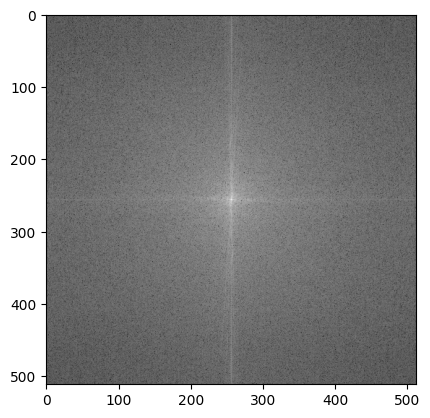

In [11]:
magnitude_spectrum = np.abs(fft_shifted_img)
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
plt.savefig('walkbridge_magnitude_spectrum.jpg')

Phase spectrum

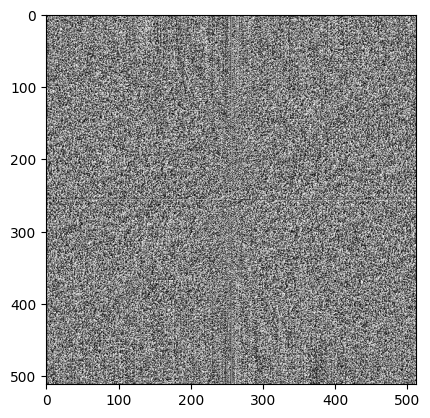

In [12]:
phase_spectrum = np.angle(fft_shifted_img)
plt.imshow(phase_spectrum, cmap='gray')
plt.savefig('walkbridge_phase_spectrum.jpg')

## Image reconstruction

In [13]:
def IFFT(x):
  N = len(x)
  x_conj = np.conj(x)
  X = FFT(x_conj)
  X = np.conj(X)/N
  return X

In [14]:
def ifft_shift(ifft_result):
  # Get the dimensions of the input IFFT result
  rows, cols = ifft_result.shape

  # Calculate the indices for splitting the quadrants
  half_rows, half_cols = rows // 2, cols // 2

  # Swap quadrants to shift the zero-frequency component to the top-left corner
  shifted_ifft_result = np.empty_like(ifft_result)

  # Bottom-right quadrant to top-left quadrant
  shifted_ifft_result[:half_rows, :half_cols] = ifft_result[half_rows:, half_cols:]
  # Bottom-left quadrant to top-right quadrant
  shifted_ifft_result[:half_rows, half_cols:] = ifft_result[half_rows:, :half_cols]
  # Top-right quadrant to bottom-left quadrant
  shifted_ifft_result[half_rows:, :half_cols] = ifft_result[:half_rows, half_cols:]
  # Top-left quadrant to bottom-right quadrant
  shifted_ifft_result[half_rows:, half_cols:] = ifft_result[:half_rows, :half_cols]

  return shifted_ifft_result


In [15]:
shifted_ifft_result = ifft_shift(fft_shifted_img)

In [16]:
shifted_ifft_result.shape

(512, 512)

In [17]:
#column transformation
recon_img=np.zeros([image.shape[0], image.shape[1]], dtype=complex)
for i in range(image.shape[0]):
  row = []
  for j in range(image.shape[1]):
    row.append(shifted_ifft_result[j][i])

  transformed_row = IFFT(row)
  recon_img[:,i] = transformed_row

In [18]:
#row transformation
recon_img_final=np.zeros([image.shape[0], image.shape[1]], dtype=complex)
for i in range(image.shape[0]):
  column = []
  for j in range(image.shape[1]):
    column.append(recon_img[i][j])

  transformed_column = IFFT(column)
  recon_img_final[i, :] = transformed_column

In [19]:
reconstruced_image = np.abs(recon_img_final)

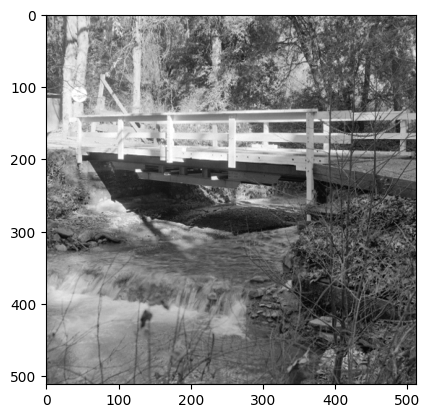

In [20]:
plt.imshow(reconstruced_image, cmap='gray')
plt.savefig('walkbridge_reconstructed_image.jpg')

#Question-2

In [23]:
tiff_file = 'dip.tif'

In [24]:
import matplotlib.pyplot as plt
I = plt.imread(tiff_file)

In [ ]:
print(I.shape)

(256, 256)


In [26]:
new_I = np.zeros([I.shape[0], I.shape[1]])
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    new_I[i][j] = np.power(-1, (i+j))*I[i][j]

In [ ]:
print(new_I)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(np.unique(new_I))

[-255. -239. -223. -207. -191. -175. -159. -143. -127. -111.  -95.  -79.
  -63.  -47.  -31.  -15.    0.   15.   31.   47.   63.   79.   95.  111.
  127.  143.  159.  175.  191.  207.  223.  239.  255.]


In [27]:
#Row transformation
new_img2=np.zeros([I.shape[0], I.shape[1]], dtype='complex_')
for i in range(I.shape[0]):
  row = []
  for j in range(I.shape[1]):
    row.append(new_I[i][j])

  transformed_row = FFT(row)
  new_img2[i, :] = transformed_row

In [28]:
#Column transformation
new_img_final2=np.zeros([I.shape[0], I.shape[1]], dtype='complex_')
for i in range(I.shape[0]):
  column = []
  for j in range(I.shape[1]):
    column.append(new_img2[j][i])

  transformed_column = FFT(column)
  new_img_final2[:, i] = transformed_column

In [29]:
fft_conjugate = np.conjugate(new_img_final2)

In [30]:
#Column transformation
recon_img2=np.zeros([I.shape[0], I.shape[1]], dtype=complex)
for i in range(I.shape[0]):
  row = []
  for j in range(I.shape[1]):
    row.append(fft_conjugate[j][i])

  transformed_row = IFFT(row)
  recon_img2[:,i] = transformed_row

In [31]:
#row transformation
recon_img_final2=np.zeros([I.shape[0], I.shape[1]], dtype=complex)
for i in range(I.shape[0]):
  column = []
  for j in range(I.shape[1]):
    column.append(recon_img2[i][j])

  transformed_column = IFFT(column)
  recon_img_final2[i, :] = transformed_column

In [32]:
new_I_final = np.zeros([I.shape[0], I.shape[1]])
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    new_I_final[i][j] = np.power(-1, (i+j))*np.real(recon_img_final2[i][j])

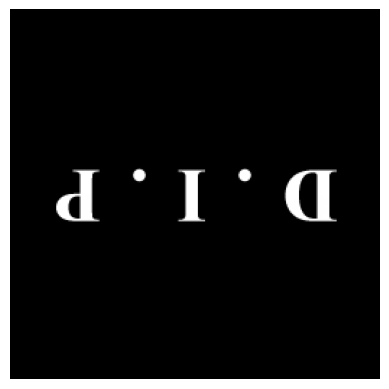

In [33]:
plt.imshow(np.uint8(new_I_final), cmap='gray')
plt.axis('off')
plt.savefig('dip_output.tif')

# Verifcation with standard functions

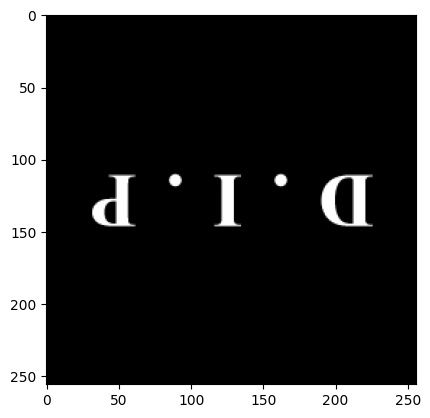

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define your own FFT and iFFT functions (you can use the ones from Q1)

# Step 1: Read the image
image = Image.open("dip.tif").convert('L')  # Convert to grayscale if needed

# Step 2: Multiply the image by (-1)^(x + y)
width, height = image.size
X, Y = np.meshgrid(np.arange(width), np.arange(height))
multiplier = (-1) ** (X + Y)
image_data = np.array(image) * multiplier

# Step 3: Compute the FFT
fft_result = np.fft.fft2(image_data)

# Step 4: Compute the Complex Conjugate of FFT
fft_conjugate = np.conjugate(fft_result)

# Step 5: Compute Inverse FFT (iFFT) of the Complex Conjugate
ifft_result = np.fft.ifft2(fft_conjugate)

# Step 6: Multiply the real part of iFFT by (-1)^(x + y)
ifft_result_real = np.real(ifft_result) * multiplier

plt.imshow(np.uint8(ifft_result_real), cmap = 'gray')

# Save the resultant image if needed
# result_image.save("result_image.tiff")

# Explanation:
# The operations described are a series of Fourier domain manipulations. Multiplying by (-1)^(x + y)
# effectively shifts the image's frequency spectrum. The complex conjugate ensures that the iFFT results in
# a real-valued image, and finally, multiplying by (-1)^(x + y) again shifts the spectrum back.


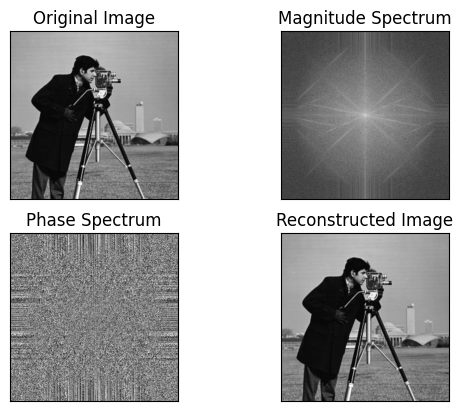

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def compute_fft(image):
    # Convert the input image to grayscale if it's not already.
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform FFT on the image.
    fft_result = np.fft.fft2(image)
    # Shift the zero frequency component to the center.
    fft_result = np.fft.fftshift(fft_result)

    # Compute the magnitude and phase spectrum.
    magnitude_spectrum = np.abs(fft_result)
    phase_spectrum = np.angle(fft_result)

    return magnitude_spectrum, phase_spectrum

def compute_ifft(magnitude_spectrum, phase_spectrum):
    # Shift the zero frequency component back to its original position.
    shifted_magnitude = np.fft.ifftshift(magnitude_spectrum * np.exp(1j * phase_spectrum))

    # Compute the inverse FFT.
    ifft_result = np.fft.ifft2(shifted_magnitude)

    # Take the real part and normalize the values.
    ifft_result = np.abs(ifft_result)
    ifft_result = (ifft_result - np.min(ifft_result)) / (np.max(ifft_result) - np.min(ifft_result))

    return ifft_result

# Load an image.
image = cv2.imread('cameraman.jpg', 0)

# Compute FFT and IFFT.
magnitude_spectrum, phase_spectrum = compute_fft(image)
reconstructed_image = compute_ifft(magnitude_spectrum, phase_spectrum)

# Display the original image, magnitude spectrum, phase spectrum, and reconstructed image.
plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3), plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4), plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image'), plt.xticks([]), plt.yticks([])

plt.show()
